In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [58]:
# Load and prepare dataset
data = pd.read_csv(
    "python-k-nearest-neighbors/dataset.csv"
)

# Remove empty column
data = data.drop(columns=["Unnamed: 32"], errors="ignore")

# Separate features and target
X = data.drop(columns=["id", "diagnosis"]).to_numpy()
y = data["diagnosis"].to_numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

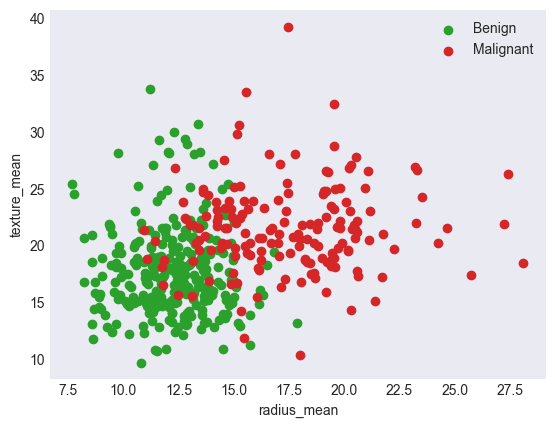

In [59]:
# Visualize data distribution
benign_points = X_train[y_train == "B"]
malignant_points = X_train[y_train == "M"]

plt.scatter(benign_points[:, 0], benign_points[:, 1], color="tab:green", label="Benign")
plt.scatter(
    malignant_points[:, 0], malignant_points[:, 1], color="tab:red", label="Malignant"
)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [60]:
# Calculate Euclidean distance between two points
def euclidean_dist(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

In [61]:
# KNN classifier implementation
class KNN:
    def __init__(self, k):
        self.k = k

    # Store training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Predict multiple points
    def predict(self, new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)

    # Predict single point using k nearest neighbors
    def predict_class(self, new_point):
        distances = [euclidean_dist(point, new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[: self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common_label

In [62]:
# Train and evaluate custom KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

k = 7
knn = KNN(k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, predictions) * 100
confusion_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy for k({k}): {accuracy:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report:")
print(report)

Accuracy for k(7): 95.61%
Confusion Matrix:
[[70  1]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<function matplotlib.pyplot.show(close=None, block=None)>

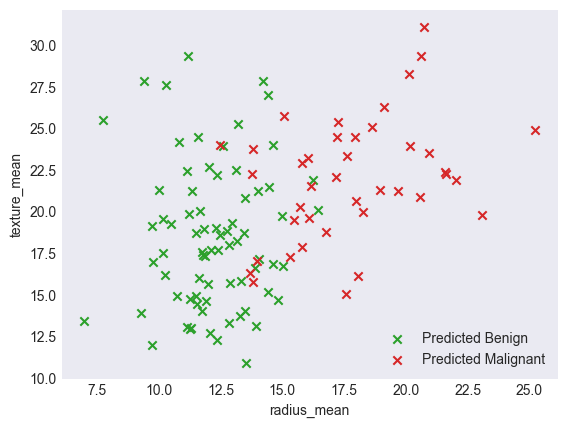

In [63]:
# Visualize predictions
predicted_benign = X_test[predictions == "B"]
predicted_malignant = X_test[predictions == "M"]
plt.scatter(
    predicted_benign[:, 0],
    predicted_benign[:, 1],
    color="tab:green",
    label="Predicted Benign",
    marker="x",
)
plt.scatter(
    predicted_malignant[:, 0],
    predicted_malignant[:, 1],
    color="tab:red",
    label="Predicted Malignant",
    marker="x",
)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show

# Comparison with Scikit-learn
Compare our custom implementation with scikit-learn's KNN classifier.

In [64]:
# Train scikit-learn KNN model
from sklearn.neighbors import KNeighborsClassifier

k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
# Evaluate scikit-learn model
from sklearn.metrics import confusion_matrix
skl_predictions = model.predict(X_test)

accuracy_skl = accuracy_score(y_test, skl_predictions) * 100
confusion_matrix_skl = confusion_matrix(y_test, skl_predictions)
report_sk = classification_report(y_test, skl_predictions)

print(f"Accuracy for k({k}): {accuracy_skl:.2f}%")
print("Confusion Matrix (scikit-learn):")
print(confusion_matrix_skl)
print("Classification Report (scikit-learn):")
print(report_sk)

Accuracy for k(7): 95.61%
Confusion Matrix (scikit-learn):
[[70  1]
 [ 4 39]]
Classification Report (scikit-learn):
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

